In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Analysis of Single/Multi Branch Architectures

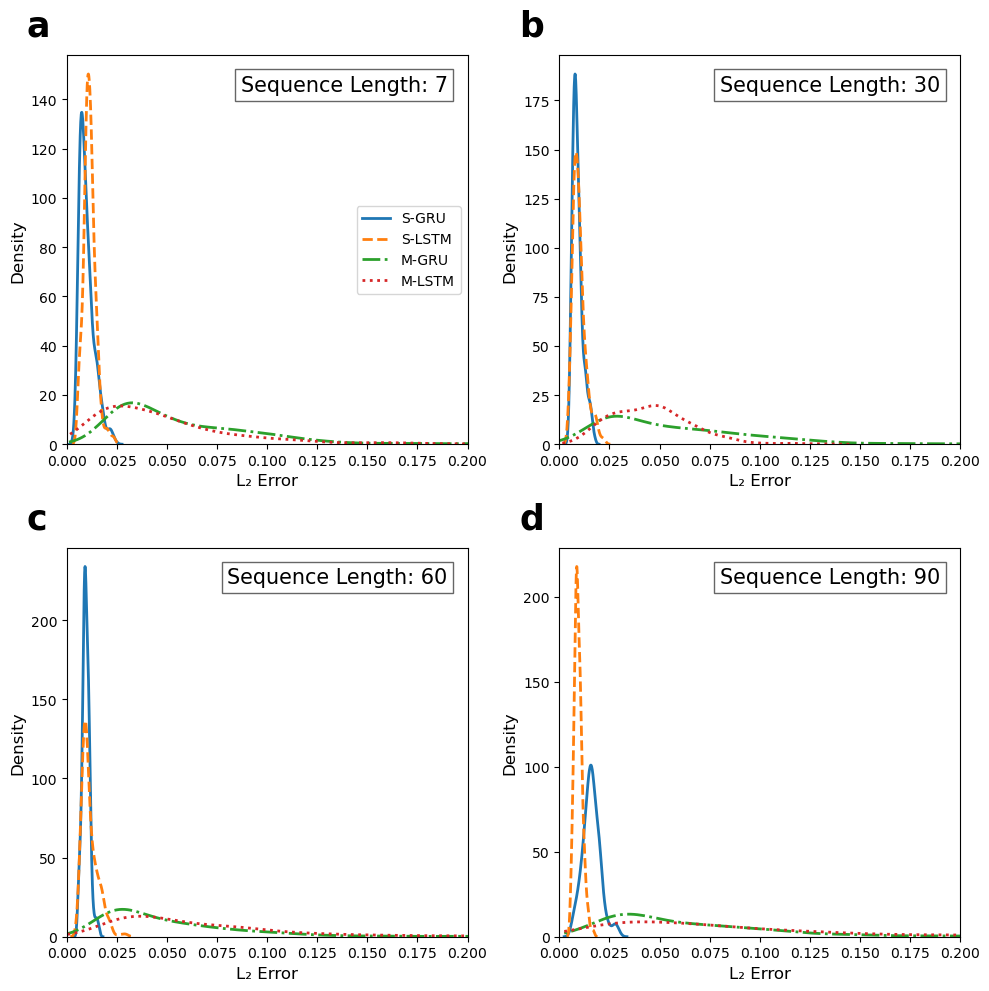

In [2]:
# Data directories
sdata_dir = 'single_branch/array/'
mdata_dir = 'multi_branch/array/'

# Load single-branch GRU/LSTM results
sgru_7 = np.load(sdata_dir + 'gru_window_7_results.npy')[:, 3]
sgru_30 = np.load(sdata_dir + 'gru_window_30_results.npy')[:, 3]
sgru_60 = np.load(sdata_dir + 'gru_window_60_results.npy')[:, 3]
sgru_90 = np.load(sdata_dir + 'gru_window_90_results.npy')[:, 3]

slstm_7 = np.load(sdata_dir + 'lstm_window_7_results.npy')[:, 3]
slstm_30 = np.load(sdata_dir + 'lstm_window_30_results.npy')[:, 3]
slstm_60 = np.load(sdata_dir + 'lstm_window_60_results.npy')[:, 3]
slstm_90 = np.load(sdata_dir + 'lstm_window_90_results.npy')[:, 3]

# Load multi-branch GRU/LSTM results
mgru_7 = np.load(mdata_dir + 'gru_window_7_results.npy')[:, 3]
mgru_30 = np.load(mdata_dir + 'gru_window_30_results.npy')[:, 3]
mgru_60 = np.load(mdata_dir + 'gru_window_60_results.npy')[:, 3]
mgru_90 = np.load(mdata_dir + 'gru_window_90_results.npy')[:, 3]

mlstm_7 = np.load(mdata_dir + 'lstm_window_7_results.npy')[:, 3]
mlstm_30 = np.load(mdata_dir + 'lstm_window_30_results.npy')[:, 3]
mlstm_60 = np.load(mdata_dir + 'lstm_window_60_results.npy')[:, 3]
mlstm_90 = np.load(mdata_dir + 'lstm_window_90_results.npy')[:, 3]

# Sequence labels
sequence_labels = ["a", "b", 
                   "c", "d"]

# Line styles for each model
line_styles = ["-", "--", "-.", ":"]  # Solid, dashed, dash-dot, dotted

# Model names
model_labels = ["S-GRU", "S-LSTM", "M-GRU", "M-LSTM"]

# Corresponding sequence lengths
sequence_lengths = [7, 30, 60, 90]

# Extracted L₂ error for each sequence length
data_list = [[sgru_7, slstm_7, mgru_7, mlstm_7],
             [sgru_30, slstm_30, mgru_30, mlstm_30],
             [sgru_60, slstm_60, mgru_60, mlstm_60],
             [sgru_90, slstm_90, mgru_90, mlstm_90]]

# Create 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# **Loop through each panel to plot L₂ Error for different sequence lengths**
for i, ax in enumerate(ax.flat):
    for data, label, ls in zip(data_list[i], model_labels, line_styles):
        sns.kdeplot(data, ax=ax, label=label, linestyle=ls, linewidth=2)  # L₂ Error ([:,3])
    
    ax.set_xlabel("L₂ Error", fontsize=12)
    ax.set_ylabel("Density", fontsize=12)
    ax.set_xlim([0, 0.2])  # Limit x-axis to 0-0.3
    #ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Scientific notation
    #ax.tick_params(axis='x', rotation=30)  # Rotate x-tick labels
    ax.text(-0.1, 1.05, sequence_labels[i], transform=ax.transAxes, 
            fontsize=25, fontweight='bold')  # Panel label (a, b, c, d)
    
    # Only show legend in the first panel (a)
    if i == 0:
        ax.legend(fontsize=10, loc='center right')  # Show legend
    else:
        ax.legend().set_visible(False)  # Hide legend for other panels
        
        
    # Add "Sequence Length: X" inside each panel (top-right)
    ax.text(0.95, 0.95, f"Sequence Length: {sequence_lengths[i]}", 
            transform=ax.transAxes, fontsize=15, 
            ha='right', va='top', bbox=dict(facecolor='white', alpha=0.6, edgecolor='black'))


# Adjust layout for better spacing
plt.tight_layout()
#plt.savefig('figures/l2_errors.png', dpi=300)
plt.show()


## Analysis of Field Output

In [3]:
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap

In [6]:
# load the preds & targets obtaned from single lstm branch with 30 squential length
data = np.load('single_branch/array/gru_window_30_preds_targets.npy')
preds = data[:,0]
targets = data[:,1]

In [7]:
# compute the l2 error
l2 = []
for i in range(len(preds)):
    preds[i] = np.array(preds[i])
    targets[i] = np.array(targets[i])
    l2_error = np.linalg.norm(preds[i] - targets[i], 2)
    l2.append(l2_error)
    
l2 = np.array(l2)

# create a pandas dataframe
df = pd.DataFrame({'L2 Error': l2})

# find the idx for the best, 75th, 50th, 25th, worst
best_idx = np.argmin(l2)
worst_idx = np.argmax(l2)
q25_idx = np.argsort(l2)[int(len(l2)*0.25)]
q50_idx = np.argsort(l2)[int(len(l2)*0.5)]
q75_idx = np.argsort(l2)[int(len(l2)*0.75)]
idxs = [best_idx, q25_idx, q50_idx, q75_idx, worst_idx]
print(idxs)

# print corresponding l2 error
for i in idxs:
    print(f'l2 error: {l2[i]}')

[119, 253, 272, 0, 31]
l2 error: 0.005132722668349743
l2 error: 0.00729042524471879
l2 error: 0.00842092465609312
l2 error: 0.01027634833008051
l2 error: 0.01737651787698269


In [8]:
def convert2dim(dose_array):
    # laod the grid_array
    grid_array = np.load('data/grid_points.npy')

    # Sort grid_array by latitude first (column 0), then by longitude (column 1)
    sorted_indices = np.lexsort((grid_array[:, 1], grid_array[:, 0]))
    sorted_grid_array = grid_array[sorted_indices]
    sorted_dose_array = dose_array[sorted_indices]
    
    # Extract unique latitude and longitude values from the sorted grid array
    latitudes = np.unique(sorted_grid_array[:, 0])  # Extract unique latitude values (y-axis)
    longitudes = np.unique(sorted_grid_array[:, 1])  # Extract unique longitude values (x-axis)

    # Create a meshgrid with (longitude, latitude) to match the correct order
    lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)

    # Ensure the sorted dose_array is reshaped correctly to match the meshgrid dimensions
    z = sorted_dose_array.reshape(len(latitudes), len(longitudes))
    
    return lon_grid, lat_grid, z

### Visualization  
__Do not forget the scaling factor__ 10^{-2} for simulations and predictions, also error 10^{-5}

In [10]:
vmax = preds.max()
vmin = preds.min()

print(vmax, vmin)

0.03717876 0.026770871


In [11]:
lon_grid, lat_grid, target = convert2dim(targets[best_idx])
_, _, pred = convert2dim(preds[best_idx])

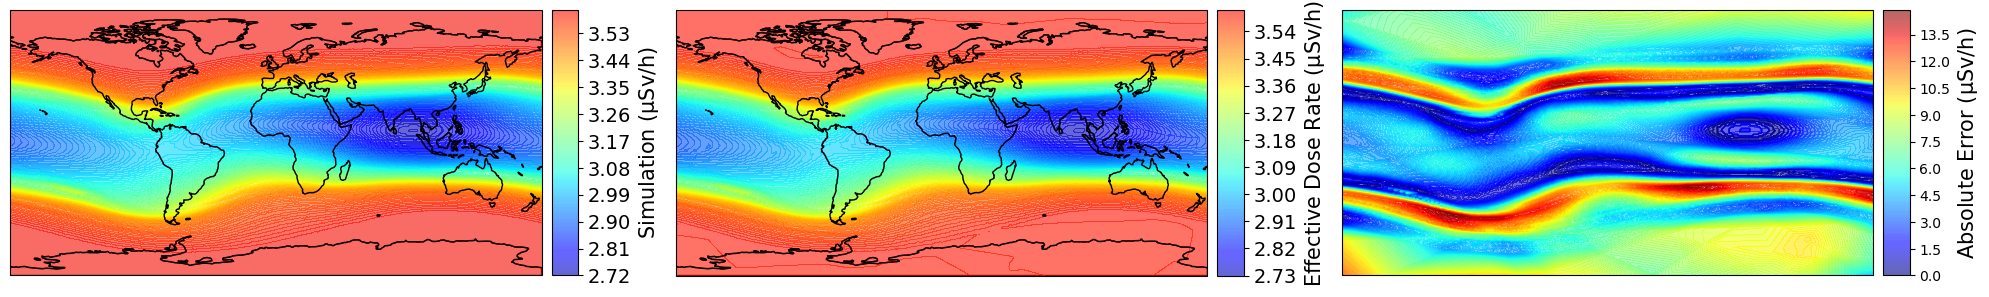

In [17]:
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from matplotlib.ticker import ScalarFormatter
aspect = 20
pad_fraction = 0.5

# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20, 8))
#plt.subplots_adjust(wspace=0.1)

# Create a "lighter" version of the jet colormap
jet_cmap = plt.cm.jet
jet_cmap_alpha = jet_cmap(np.arange(jet_cmap.N))
jet_cmap_alpha[:, -1] = 0.6  # Adjust the alpha (transparency) level to 0.6 (60% opacity)
lighter_jet_cmap = ListedColormap(jet_cmap_alpha)

# Add coastlines, borders, and land features with white land
axes[0].coastlines()
axes[0].add_feature(cfeature.LAND, edgecolor='black', facecolor='white')
# Plot the dose values (targets) 
contour = axes[0].contourf(lon_grid, lat_grid, target * 100, levels=150, cmap=lighter_jet_cmap, transform=ccrs.PlateCarree(), vmin=vmin*100, vmax=vmax*100)
divider0 = make_axes_locatable(axes[0])
cax0 = divider0.append_axes("right", size="5%", pad=0.1, axes_class=plt.Axes)
cbar0 = fig.colorbar(contour, cax=cax0, format="%.2f")
cbar0.set_label(r'Simulation ($\rm \mu Sv/h$)', fontsize=15)  # Increase font size
cbar0.ax.tick_params(labelsize=14)  # Increase tick label size

# Plot the dose values (preds)
axes[1].coastlines()
axes[1].add_feature(cfeature.LAND, edgecolor='black', facecolor='white')
contour = axes[1].contourf(lon_grid, lat_grid, pred * 100, levels=150, cmap=lighter_jet_cmap, transform=ccrs.PlateCarree(), vmin=vmin*100, vmax=vmax*100)
divider1 = make_axes_locatable(axes[1])
cax1 = divider1.append_axes("right", size="5%", pad=0.1, axes_class=plt.Axes)
cbar1 = fig.colorbar(contour, cax=cax1, format="%.2f")
cbar1.set_label(r'Effective Dose Rate ($\rm \mu Sv/h$)', fontsize=15)  # Increase font size
cbar1.ax.tick_params(labelsize=14)

# error
error = np.abs(pred - target)
contour = axes[2].contourf(lon_grid, lat_grid, error * 10**5, levels=150, cmap=lighter_jet_cmap, transform=ccrs.PlateCarree())
divider2 = make_axes_locatable(axes[2])
cax2 = divider2.append_axes("right", size="5%", pad=0.1, axes_class=plt.Axes)
cbar2 = fig.colorbar(contour, cax=cax2)
cbar2.set_label(r'Absolute Error ($\rm \mu Sv/h$)', fontsize=15)  # Increase font size


plt.tight_layout()
# save the figure
plt.savefig('figures/best_case.png', dpi=300)
plt.show()

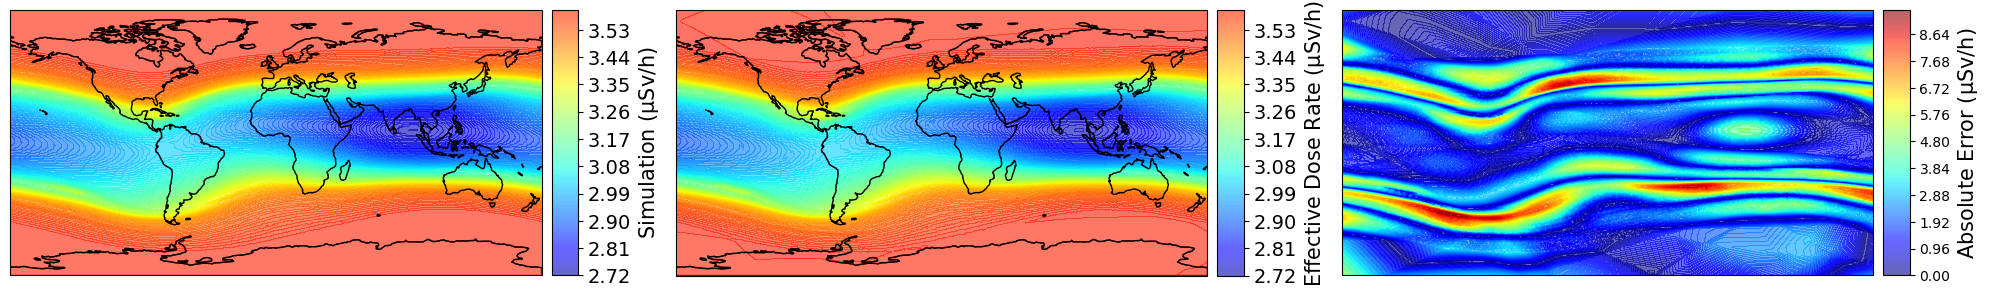

In [18]:
lon_grid, lat_grid, target = convert2dim(targets[q25_idx])
_, _, pred = convert2dim(preds[q25_idx])

# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20, 8))
#plt.subplots_adjust(wspace=0.1)

# Create a "lighter" version of the jet colormap
jet_cmap = plt.cm.jet
jet_cmap_alpha = jet_cmap(np.arange(jet_cmap.N))
jet_cmap_alpha[:, -1] = 0.6  # Adjust the alpha (transparency) level to 0.6 (60% opacity)
lighter_jet_cmap = ListedColormap(jet_cmap_alpha)

# Add coastlines, borders, and land features with white land
axes[0].coastlines()
axes[0].add_feature(cfeature.LAND, edgecolor='black', facecolor='white')
# Plot the dose values (targets) 
contour0 = axes[0].contourf(lon_grid, lat_grid, target * 100, levels=150, cmap=lighter_jet_cmap, transform=ccrs.PlateCarree(), vmin=vmin*100, vmax=vmax*100)
divider0 = make_axes_locatable(axes[0])
cax0 = divider0.append_axes("right", size="5%", pad=0.1, axes_class=plt.Axes)
cbar0 = fig.colorbar(contour0, cax=cax0, format="%.2f")
cbar0.set_label(r'Simulation ($\rm \mu Sv/h$)', fontsize=15)  # Increase font size
cbar0.ax.tick_params(labelsize=14)  # Increase tick label size

# Plot the dose values (preds)
axes[1].coastlines()
axes[1].add_feature(cfeature.LAND, edgecolor='black', facecolor='white')
contour1 = axes[1].contourf(lon_grid, lat_grid, pred * 100, levels=150, cmap=lighter_jet_cmap, transform=ccrs.PlateCarree(), vmin=vmin*100, vmax=vmax*100)
divider1 = make_axes_locatable(axes[1])
cax1 = divider1.append_axes("right", size="5%", pad=0.1, axes_class=plt.Axes)
cbar1 = fig.colorbar(contour0, cax=cax1, format="%.2f")
cbar1.set_label(r'Effective Dose Rate ($\rm \mu Sv/h$)', fontsize=15)  # Increase font size
cbar1.ax.tick_params(labelsize=14)

# error
error = np.abs(pred - target)
contour2 = axes[2].contourf(lon_grid, lat_grid, error * 10**5, levels=150, cmap=lighter_jet_cmap, transform=ccrs.PlateCarree())
divider2 = make_axes_locatable(axes[2])
cax2 = divider2.append_axes("right", size="5%", pad=0.1, axes_class=plt.Axes)
cbar2 = fig.colorbar(contour2, cax=cax2)
cbar2.set_label(r'Absolute Error ($\rm \mu Sv/h$)', fontsize=15)  # Increase font size


plt.tight_layout()
# save the figure
plt.savefig('figures/q25_case.png', dpi=300)
plt.show()

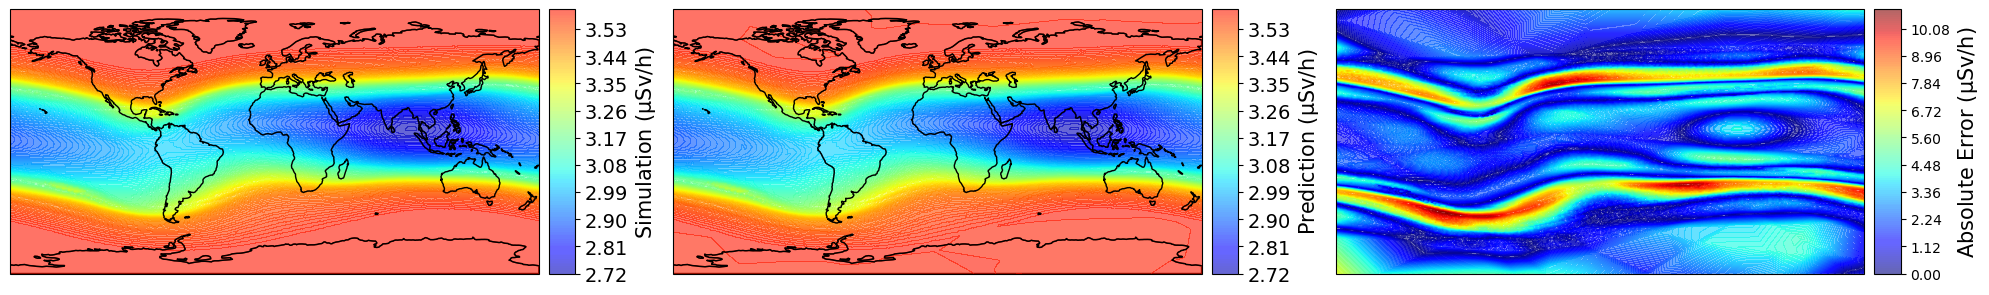

In [14]:
lon_grid, lat_grid, target = convert2dim(targets[q50_idx])
_, _, pred = convert2dim(preds[q50_idx])

# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20, 8))
#plt.subplots_adjust(wspace=0.1)

# Create a "lighter" version of the jet colormap
jet_cmap = plt.cm.jet
jet_cmap_alpha = jet_cmap(np.arange(jet_cmap.N))
jet_cmap_alpha[:, -1] = 0.6  # Adjust the alpha (transparency) level to 0.6 (60% opacity)
lighter_jet_cmap = ListedColormap(jet_cmap_alpha)

# Add coastlines, borders, and land features with white land
axes[0].coastlines()
axes[0].add_feature(cfeature.LAND, edgecolor='black', facecolor='white')
# Plot the dose values (targets) 
contour0 = axes[0].contourf(lon_grid, lat_grid, target * 100, levels=150, cmap=lighter_jet_cmap, transform=ccrs.PlateCarree(), vmin=vmin*100, vmax=vmax*100)
divider0 = make_axes_locatable(axes[0])
cax0 = divider0.append_axes("right", size="5%", pad=0.1, axes_class=plt.Axes)
cbar0 = fig.colorbar(contour0, cax=cax0, format="%.2f")
cbar0.set_label(r'Simulation ($\rm \mu Sv/h$)', fontsize=15)  # Increase font size
cbar0.ax.tick_params(labelsize=14)  # Increase tick label size

# Plot the dose values (preds)
axes[1].coastlines()
axes[1].add_feature(cfeature.LAND, edgecolor='black', facecolor='white')
contour1 = axes[1].contourf(lon_grid, lat_grid, pred * 100, levels=150, cmap=lighter_jet_cmap, transform=ccrs.PlateCarree(), vmin=vmin*100, vmax=vmax*100)
divider1 = make_axes_locatable(axes[1])
cax1 = divider1.append_axes("right", size="5%", pad=0.1, axes_class=plt.Axes)
cbar1 = fig.colorbar(contour0, cax=cax1, format="%.2f")
cbar1.set_label(r'Prediction ($\rm \mu Sv/h$)', fontsize=15)  # Increase font size
cbar1.ax.tick_params(labelsize=14)

# error
error = np.abs(pred - target)
contour2 = axes[2].contourf(lon_grid, lat_grid, error * 10**5, levels=150, cmap=lighter_jet_cmap, transform=ccrs.PlateCarree())
divider2 = make_axes_locatable(axes[2])
cax2 = divider2.append_axes("right", size="5%", pad=0.1, axes_class=plt.Axes)
cbar2 = fig.colorbar(contour2, cax=cax2)
cbar2.set_label(r'Absolute Error ($\rm \mu Sv/h$)', fontsize=15)  # Increase font size


plt.tight_layout()
# save the figure
plt.savefig('figures/q50_case.png', dpi=300)
plt.show()

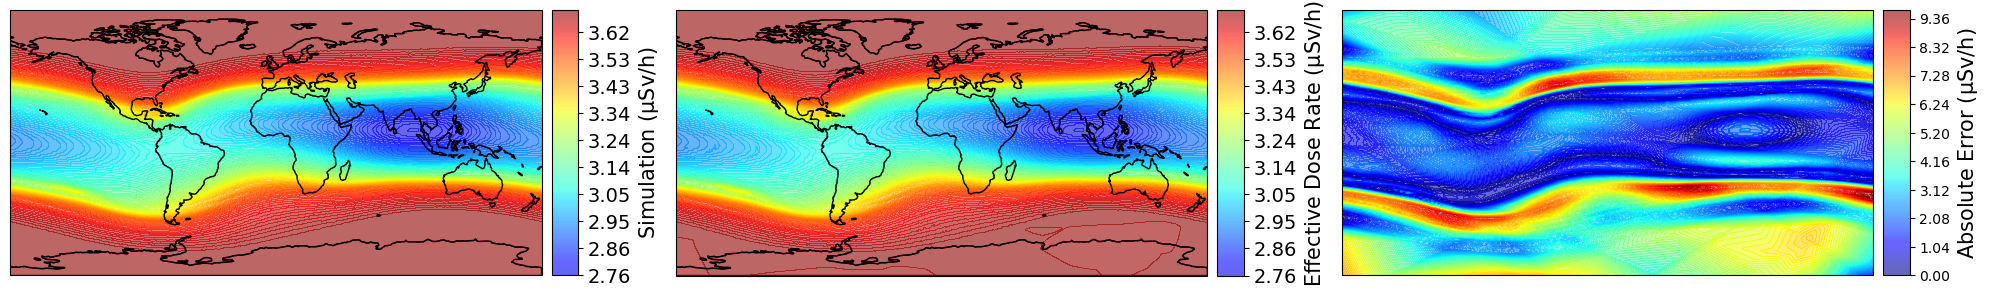

In [19]:
lon_grid, lat_grid, target = convert2dim(targets[q75_idx])
_, _, pred = convert2dim(preds[q75_idx])

# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20, 8))
#plt.subplots_adjust(wspace=0.1)

# Create a "lighter" version of the jet colormap
jet_cmap = plt.cm.jet
jet_cmap_alpha = jet_cmap(np.arange(jet_cmap.N))
jet_cmap_alpha[:, -1] = 0.6  # Adjust the alpha (transparency) level to 0.6 (60% opacity)
lighter_jet_cmap = ListedColormap(jet_cmap_alpha)

# Add coastlines, borders, and land features with white land
axes[0].coastlines()
axes[0].add_feature(cfeature.LAND, edgecolor='black', facecolor='white')
# Plot the dose values (targets) 
contour0 = axes[0].contourf(lon_grid, lat_grid, target * 100, levels=150, cmap=lighter_jet_cmap, transform=ccrs.PlateCarree(), vmin=vmin*100, vmax=vmax*100)
divider0 = make_axes_locatable(axes[0])
cax0 = divider0.append_axes("right", size="5%", pad=0.1, axes_class=plt.Axes)
cbar0 = fig.colorbar(contour0, cax=cax0, format="%.2f")
cbar0.set_label(r'Simulation ($\rm \mu Sv/h$)', fontsize=15)  # Increase font size
cbar0.ax.tick_params(labelsize=14)  # Increase tick label size

# Plot the dose values (preds)
axes[1].coastlines()
axes[1].add_feature(cfeature.LAND, edgecolor='black', facecolor='white')
contour1 = axes[1].contourf(lon_grid, lat_grid, pred * 100, levels=150, cmap=lighter_jet_cmap, transform=ccrs.PlateCarree(), vmin=vmin*100, vmax=vmax*100)
divider1 = make_axes_locatable(axes[1])
cax1 = divider1.append_axes("right", size="5%", pad=0.1, axes_class=plt.Axes)
cbar1 = fig.colorbar(contour0, cax=cax1, format="%.2f")
cbar1.set_label(r'Effective Dose Rate ($\rm \mu Sv/h$)', fontsize=15)  # Increase font size
cbar1.ax.tick_params(labelsize=14)

# error
error = np.abs(pred - target)
contour2 = axes[2].contourf(lon_grid, lat_grid, error * 10**5, levels=150, cmap=lighter_jet_cmap, transform=ccrs.PlateCarree())
divider2 = make_axes_locatable(axes[2])
cax2 = divider2.append_axes("right", size="5%", pad=0.1, axes_class=plt.Axes)
cbar2 = fig.colorbar(contour2, cax=cax2)
cbar2.set_label(r'Absolute Error ($\rm \mu Sv/h$)', fontsize=15)  # Increase font size


plt.tight_layout()
# save the figure
plt.savefig('figures/q75_case.png', dpi=300)
plt.show()

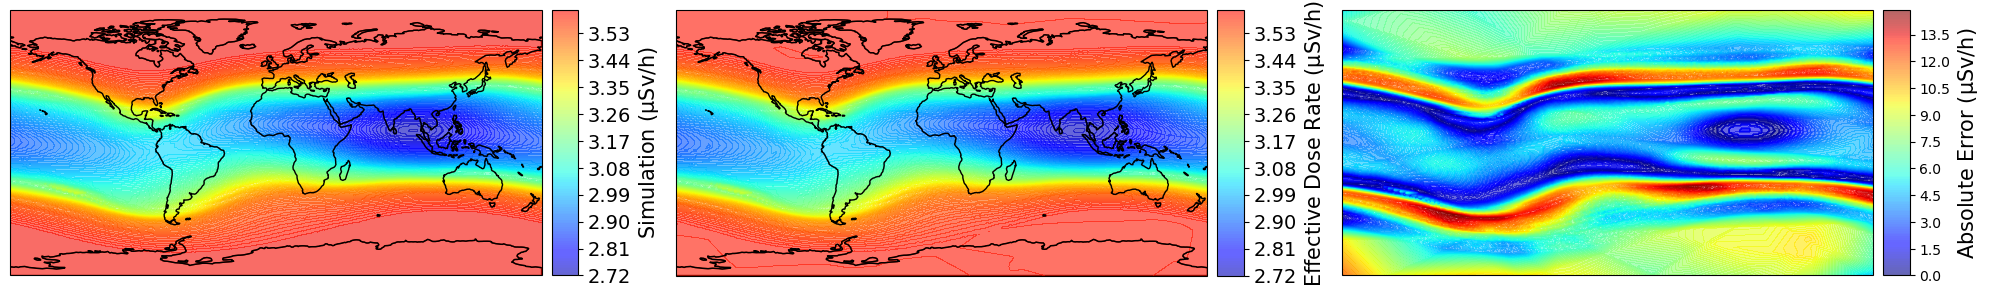

In [22]:
lon_grid, lat_grid, target = convert2dim(targets[worst_idx])
_, _, pred = convert2dim(preds[worst_idx])

# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20, 8))
#plt.subplots_adjust(wspace=0.1)

# Create a "lighter" version of the jet colormap
jet_cmap = plt.cm.jet
jet_cmap_alpha = jet_cmap(np.arange(jet_cmap.N))
jet_cmap_alpha[:, -1] = 0.6  # Adjust the alpha (transparency) level to 0.6 (60% opacity)
lighter_jet_cmap = ListedColormap(jet_cmap_alpha)

# Add coastlines, borders, and land features with white land
axes[0].coastlines()
axes[0].add_feature(cfeature.LAND, edgecolor='black', facecolor='white')
# Plot the dose values (targets) 
contour0 = axes[0].contourf(lon_grid, lat_grid, target * 100, levels=150, cmap=lighter_jet_cmap, transform=ccrs.PlateCarree(), vmin=vmin*100, vmax=vmax*100)
divider0 = make_axes_locatable(axes[0])
cax0 = divider0.append_axes("right", size="5%", pad=0.1, axes_class=plt.Axes)
cbar0 = fig.colorbar(contour0, cax=cax0, format="%.2f")
cbar0.set_label(r'Simulation ($\rm \mu Sv/h$)', fontsize=15)  # Increase font size
cbar0.ax.tick_params(labelsize=14)  # Increase tick label size

# Plot the dose values (preds)
axes[1].coastlines()
axes[1].add_feature(cfeature.LAND, edgecolor='black', facecolor='white')
contour1 = axes[1].contourf(lon_grid, lat_grid, pred * 100, levels=150, cmap=lighter_jet_cmap, transform=ccrs.PlateCarree(), vmin=vmin*100, vmax=vmax*100)
divider1 = make_axes_locatable(axes[1])
cax1 = divider1.append_axes("right", size="5%", pad=0.1, axes_class=plt.Axes)
cbar1 = fig.colorbar(contour0, cax=cax1, format="%.2f")
cbar1.set_label(r'Effective Dose Rate ($\rm \mu Sv/h$)', fontsize=15)  # Increase font size
cbar1.ax.tick_params(labelsize=14)

# error
error = np.abs(pred - target)
contour2 = axes[2].contourf(lon_grid, lat_grid, error * 10**5, levels=150, cmap=lighter_jet_cmap, transform=ccrs.PlateCarree())
divider2 = make_axes_locatable(axes[2])
cax2 = divider2.append_axes("right", size="5%", pad=0.1, axes_class=plt.Axes)
cbar2 = fig.colorbar(contour2, cax=cax2)
cbar2.set_label(r'Absolute Error ($\rm \mu Sv/h$)', fontsize=15)  # Increase font size


plt.tight_layout()
# save the figure
plt.savefig('figures/worst_case.png', dpi=300)
plt.show()